<a href="https://colab.research.google.com/github/AlfonsoVasquezC/ComputervisionMNA/blob/main/Rigo_7_2_1_Equipo_1_Google_Colab_algoritmos_de_extracci%C3%B3n_de_caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

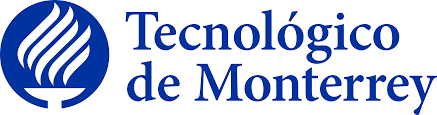

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video**
###Tecnológico de Monterrey
###Dr. Gilberto Ochoa Ruiz

## 7.2 Google Colab algoritmos de extracción de características

**Por:**

* A01183284 RODRIGO RODRIGUEZ RODRIGUEZ
* A01793132 RIGOBERTO VEGA ESCUDERO
* A01016308 ALEXIS HERNANDEZ MARTINEZ
* A00820656 JUAN ALFONSO VASQUEZ CHAPOI
* A00759664 JOEL ORLANDO HERNANDEZ RAMOS

# 7. Harris Edge & Corner Detection

## Table of Contents
1. [Libraries](#libraries)
2. [Color image to Grayscale conversion](#grayscale)
3. [Spatial derivative calculation](#spatial)
4. [Structure tensor setup](#tensor)
5. [Harris response calculation](#response)
6. [Find edges and corners using R](#find)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
from scipy.ndimage.filters import convolve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Color to Grayscale <a class="anchor" id="grayscale" ></a>

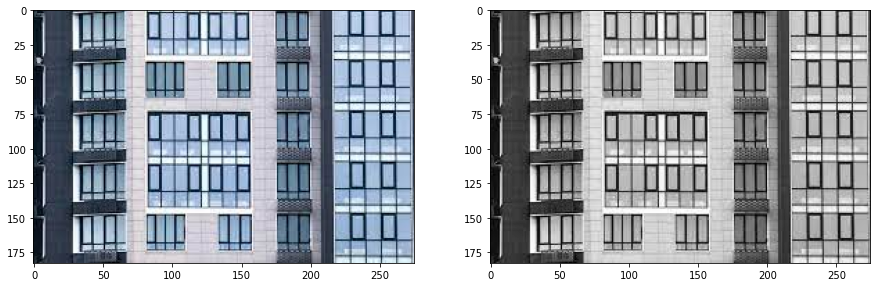

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/7.2/Ventanas.jfif')
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color)
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap="gray")

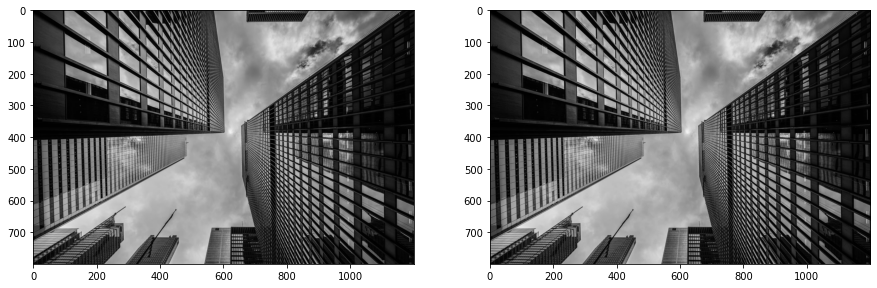

In [13]:
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/7.2/Edificios.jpg')
img_color2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color2)
plt.subplot(1, 2, 2)
plt.imshow(img_gray2, cmap="gray")

## 2. Spatial derivative calculation <a class="anchor" id="spatial" ></a>

In [16]:
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(img_gray)
I_y = gradient_y(img_gray)

I_x2 = gradient_x(img_gray2)
I_y2 = gradient_y(img_gray2)

## 3. Structure tensor setup <a class="anchor" id="tensor" ></a>

In [17]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g


Ixx = convolve(I_x**2, gaussian_kernel(3, 1))
Ixy = convolve(I_y*I_x, gaussian_kernel(3, 1))
Iyy = convolve(I_y**2, gaussian_kernel(3, 1))

Ixx2 = convolve(I_x2**2, gaussian_kernel(3, 1))
Ixy2 = convolve(I_y2*I_x2, gaussian_kernel(3, 1))
Iyy2 = convolve(I_y2**2, gaussian_kernel(3, 1))

## 4. Harris response calculation <a class="anchor" id="response" ></a>

In [ ]:
k = 0.05

# determinant
detA = Ixx * Iyy - Ixy ** 2

# trace
traceA = Ixx + Iyy
    
harris_response = detA - k * traceA ** 2

In [18]:
k2 = 0.05

# determinant
detA2 = Ixx2 * Iyy2 - Ixy2 ** 2

# trace
traceA2 = Ixx2 + Iyy2
    
harris_response2 = detA2 - k2 * traceA2 ** 2

In [ ]:
img_gray.shape

(183, 275)

In [19]:
window_size = 3
offset = window_size//2
width, height = img_gray.shape

for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])

In [20]:
window_size = 3
offset = window_size//2
width, height = img_gray2.shape

for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx2 = np.sum(Ixx2[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy2 = np.sum(Iyy2[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy2 = np.sum(Ixy2[y-offset:y+1+offset, x-offset:x+1+offset])

In [22]:
#Find determinant and trace, use to get corner response
det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
r = det - k*(trace**2)

det2 = (Sxx2 * Syy2) - (Sxy2**2)
trace2 = Sxx2 + Syy2
r2 = det2 - k2*(trace2**2)

## 5. Find edges and corners using R <a class="anchor" id="find" ></a>

In [23]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]

In [24]:
img_copy_for_corners2 = np.copy(img2)
img_copy_for_edges2 = np.copy(img2)

for rowindex, response in enumerate(harris_response2):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners2[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges2[rowindex, colindex] = [0,255,0]

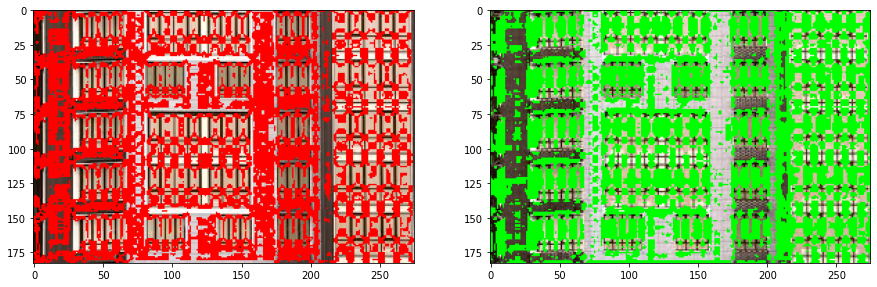

In [25]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_copy_for_corners, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img_copy_for_edges, cmap="gray")

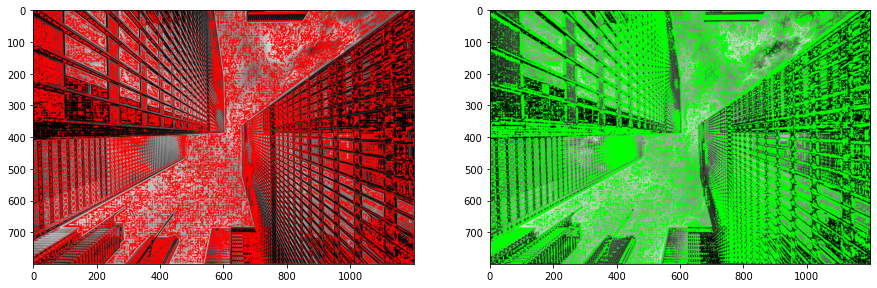

In [26]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_copy_for_corners2, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img_copy_for_edges2, cmap="gray")

#Conclusiones.

El algoritmo de detección Harris Corner fue desarrollado para identificar las esquinas internas de una imagen. Las esquinas de una imagen se identifican básicamente como las regiones en las que hay variaciones de gran intensidad del degradado en todas las dimensiones y direcciones posibles. Las esquinas extraídas pueden ser parte de las características de la imagen, que se pueden combinar con características de otras imágenes y se pueden usar para extraer información precisa. Es por ello que Harris Corner Detection es un método para extraer las esquinas de la imagen de entrada y extraer características de la imagen de entrada, pero podemos notar que en imagenes muy detalladas se requiere hacer modificaciones a los kernels para poder obtener de manera mas precisa dichas caracteristicas.

#Referencias


- Gonzalez, R. & Woods, R. (2018). Digital Image Processing. 4° Edition. 
Pearson.

- Javaheri, B. (2022, 03 24). Feature extraction and image classification using Deep Neural Networks and OpenCV. Retrieved from https://www.dominodatalab.com/blog/feature-extraction-and-image-classification-using-deep-neural-networks

- OpenCV. (2023). Feature Detection and Description. Retrieved from https://docs.opencv.org/3.4/db/d27/tutorial_py_table_of_contents_feature2d.html

- Ruiz, G. O. (2023). Módulo 3.2: Extracción de Descriptores. 